# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [2]:
base = pd.read_csv("CARDIO_BASE-M27.csv", delimiter=';')

In [10]:
# seu código aqui
base.head(11)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
5,60,1,151,67,2,2,0,0,0,0
6,61,1,157,93,3,1,0,0,1,0
7,62,2,178,95,3,3,0,0,1,1
8,48,1,158,71,1,1,0,0,1,0
9,54,1,164,68,1,1,0,0,0,0


In [24]:
base.info() #verificando o tipo dos dados e valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [5]:
base['weight'] = base['weight'].str.replace(',','.', regex=False) #modificando o tipo da variavel peso para float
base['weight'] = base['weight'].astype(float)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   gender          10000 non-null  int64  
 2   height          10000 non-null  int64  
 3   weight          10000 non-null  float64
 4   cholesterol     10000 non-null  int64  
 5   gluc            10000 non-null  int64  
 6   smoke           10000 non-null  int64  
 7   alco            10000 non-null  int64  
 8   active          10000 non-null  int64  
 9   cardio_disease  10000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


In [56]:
base.describe() #verificando outliers

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


R - No gráfico abaixo podemos ver que uma grande parte das pessoas que possuem o colesterol alto também possuem problemas cardiovasculares e também é possivel perceber que o problema cardiovascular também afeta pessoas que não possuem o colesterol alto embora o numero de pessoas saudavéis seja maior nesse caso.

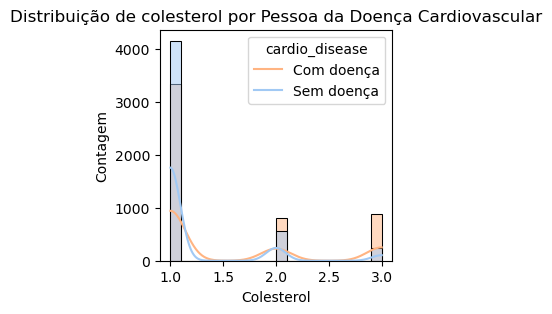

In [53]:
plt.figure(figsize=(3,3))
sns.histplot(data=base, x='cholesterol', hue='cardio_disease', bins=20, palette='pastel', kde=True)
plt.xlabel('Colesterol')
plt.ylabel('Contagem')
plt.title('Distribuição de colesterol por Pessoa da Doença Cardiovascular')
plt.legend(title='cardio_disease', labels=['Com doença', 'Sem doença'])
plt.show()

R - Aqui podemos ver que o problema cardiovascular também afeta pessoas que possuem uma glicose média ou alta.

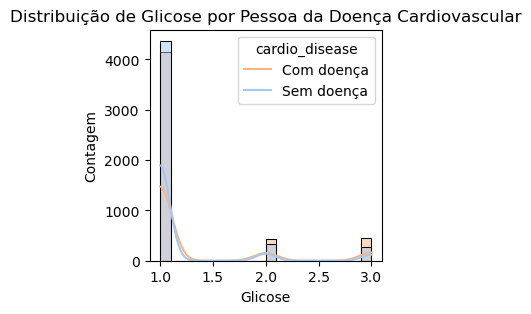

In [55]:
plt.figure(figsize=(3,3))
sns.histplot(data=base, x='gluc', hue='cardio_disease', bins=20, palette='pastel', kde=True)
plt.xlabel('Glicose')
plt.ylabel('Contagem')
plt.title('Distribuição de Glicose por Pessoa da Doença Cardiovascular')
plt.legend(title='cardio_disease', labels=['Com doença', 'Sem doença'])
plt.show()

R - Na relação entre a doença cardiovascular e a idade percebe-se que esse problema atinge pessoas entre 55 a 65 anos de idade com mais frêquencia.

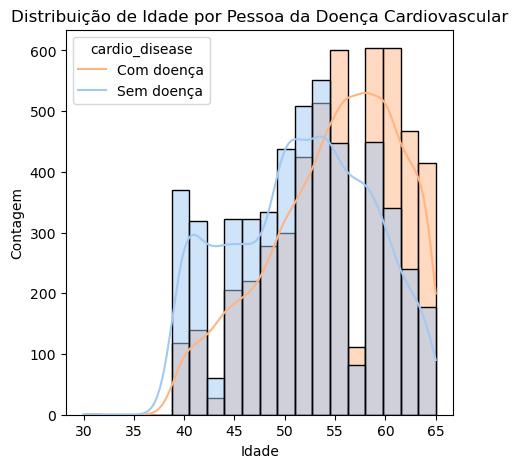

In [57]:
plt.figure(figsize=(5,5))
sns.histplot(data=base, x='age', hue='cardio_disease', bins=20, palette='pastel', kde=True)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idade por Pessoa da Doença Cardiovascular')
plt.legend(title='cardio_disease', labels=['Com doença', 'Sem doença'])
plt.show()

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



R - As variáveis que possuem uma correlação mais forte entre si são altura e gênero, altura e peso, gênero e fumante, colesterol e glicose, fumante e alcolico, cardio e idade, cardio e colesterol.

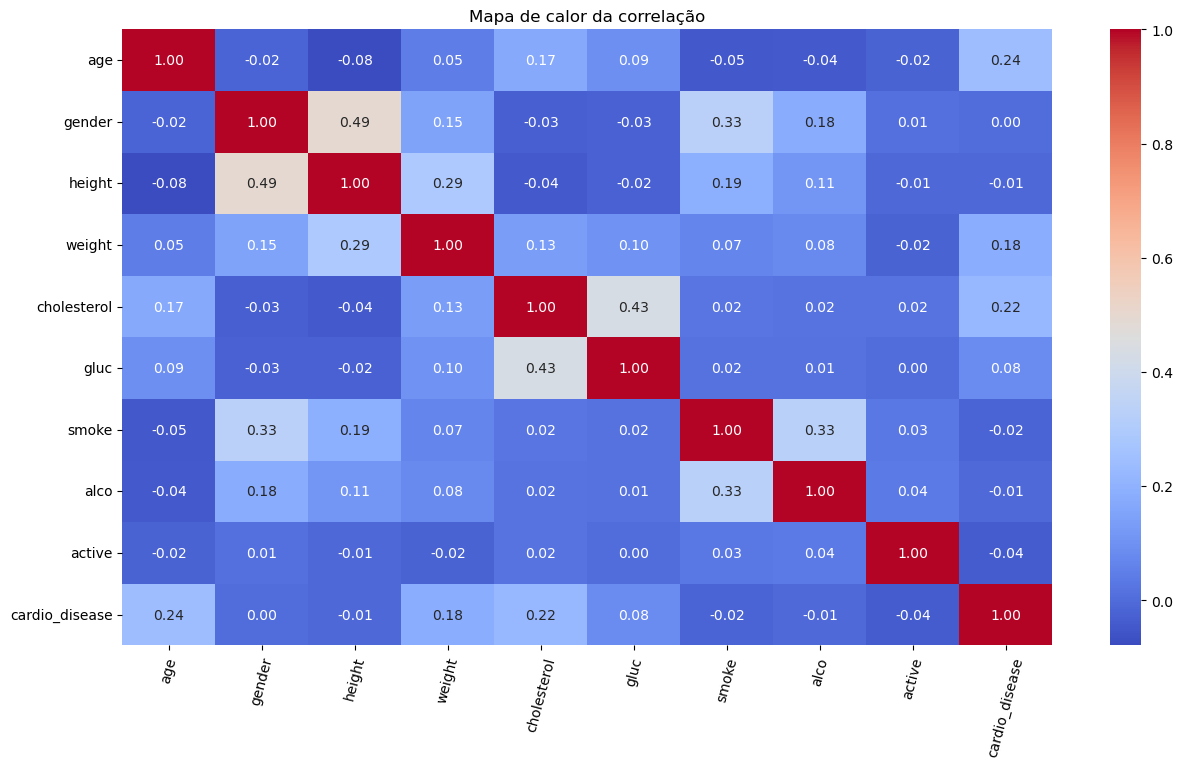

In [129]:
# seu código aqui
matrix = base.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Mapa de calor da correlação')
plt.xticks(rotation=75)
plt.show()

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [7]:
# seu código aqui
x = base.drop('cardio_disease', axis=1) #separando a base entre treino e teste
y = base['cardio_disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

B e C) R - Sim, eu acredito que a base precisa ser padronizada e balanceada pois os valores da media e desvio padrao das colunas de idade, altura e peso podem enviesar o modelo de regressão logistica.

In [191]:
media = base['age'].mean() #verificando se a base precisa ser padronizada e balanceada
print('idade media', media)
desvio = base['age'].std()
print('idade desvio', desvio)

media = base['height'].mean()
print('altura media', media)
desvio = base['height'].std()
print('altura desvio', desvio)

media = base['weight'].mean()
print('peso media', media)
desvio = base['weight'].std()
print('peso desvio', desvio)

idade media 53.2883
idade desvio 6.79623439782662
altura media 164.3082
altura desvio 8.178795878991068
peso media 74.30371
peso desvio 14.566352704057858


In [9]:
categoricos = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'] #codificando variáveis categóricas
x_encoded = pd.get_dummies(x, columns=categoricos, drop_first=True)

if x_encoded.isnull().sum().sum() > 0: #tratando valores ausentes
    x_encoded = x_encoded.fillna(x_encoded.mean())

scaler = StandardScaler() #padronizando os dados
x_scaled = scaler.fit_transform(x_encoded)

smote = SMOTE(random_state=42) #balanceando os dados
x_train_balanced, y_train_balanced = smote.fit_resample(x_scaled, y)

In [11]:
x_train.shape

(7500, 9)

In [13]:
x_test.shape

(2500, 9)

In [15]:
y_train.shape

(7500,)

In [17]:
y_test.shape

(2500,)

# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [19]:
# seu código aqui
logic_train = LogisticRegression(random_state=0) #aplicando o modelo na base de treino
logic_train.fit(x_train_balanced, y_train_balanced)

LogisticRegression(random_state=0)

In [21]:
logic_train.intercept_ #calculando o intercept

array([0.01935456])

In [23]:
logic_train.coef_ #calculando o coeficiente linear

array([[ 0.43464969, -0.08289663,  0.38033142,  0.0240195 ,  0.1501265 ,
         0.43209909,  0.00327903, -0.09897449, -0.04108603, -0.01041691,
        -0.07850094]])

In [25]:
previsao_treino = logic_train.predict(x_train_balanced) #gerando as metricas de avaliação do treino
revisao_treino = classification_report(y_train_balanced, previsao_treino)
print(revisao_treino)

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      5031
           1       0.65      0.61      0.63      5031

    accuracy                           0.64     10062
   macro avg       0.64      0.64      0.64     10062
weighted avg       0.64      0.64      0.64     10062



D) R - Avaliando as metricas da regressão logistica me parece que o modelo fez boas previsões sim, as pontuações não estão muito altas porém estão acima de 0.50 o que indica um resultado aceitável do modelo.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [27]:
# seu código aqui
logic_test = LogisticRegression(random_state=0, max_iter=500) #aplicando o modelo na base de teste
logic_test.fit(x_test, y_test)

LogisticRegression(max_iter=500, random_state=0)

In [29]:
previsao_teste = logic_test.predict(x_test) #gerando as metricas de avaliação do teste
revisao_teste = classification_report(y_test, previsao_teste)
print(revisao_teste)

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1243
           1       0.66      0.60      0.63      1257

    accuracy                           0.64      2500
   macro avg       0.64      0.64      0.64      2500
weighted avg       0.64      0.64      0.64      2500



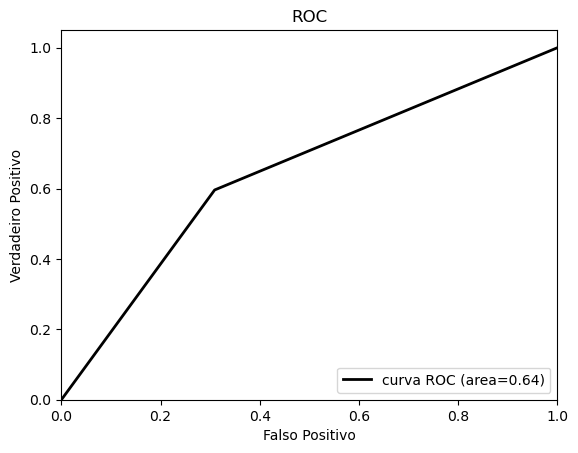

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, previsao_teste) #calculando o ROC.
roc_auc = roc_auc_score(y_test, previsao_teste)          #calculando o AUC. 

plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='curva ROC (area=%0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

C) R - Através do gráfico é possível ver a curva ROC em 0.6 ou em 0.64 mais precisamente, esse não seria um modelo ideal porém também não está tão ruim, visto que a pontuação está acima dos 50%.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



# seu código aqui

A) R - A regressão logistica é um método estatístico de classificação que usa a probabilidade para decidir entre duas opções e prever resultados binários com base em variáveis independentes.

B) R - A regressão logística é considerada um modelo de classificação porque ela p Prevc Class ) em vez dv Valorec Contínu, usa uma função de limite (Threshold) para decisão e é otimizada para problemas binários, apesar do nome "regressão", ela não prevê valores contínuos, e sim categorias, tornando-a um modelo de classificação binária.

C) R - Apesar de uma ser usada para classificação e a outra para regressão, elas compartilham várias semelhanças como, ambas usam variáveis de entrada (features) para gerar a saída, método de treinamento, interpretabilidade, são sensíveis a multicolinearidade e requerem escalonamento de features, por exemplo o StandardScaler, para melhorar o desempenho.
os